In [2]:
import pandas as pd
df_train = pd.read_excel('Data_Train.xlsx')
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df_test = pd.read_excel('Test_set.xlsx')
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [7]:
final_df = pd.concat([df_train, df_test], ignore_index = True)
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


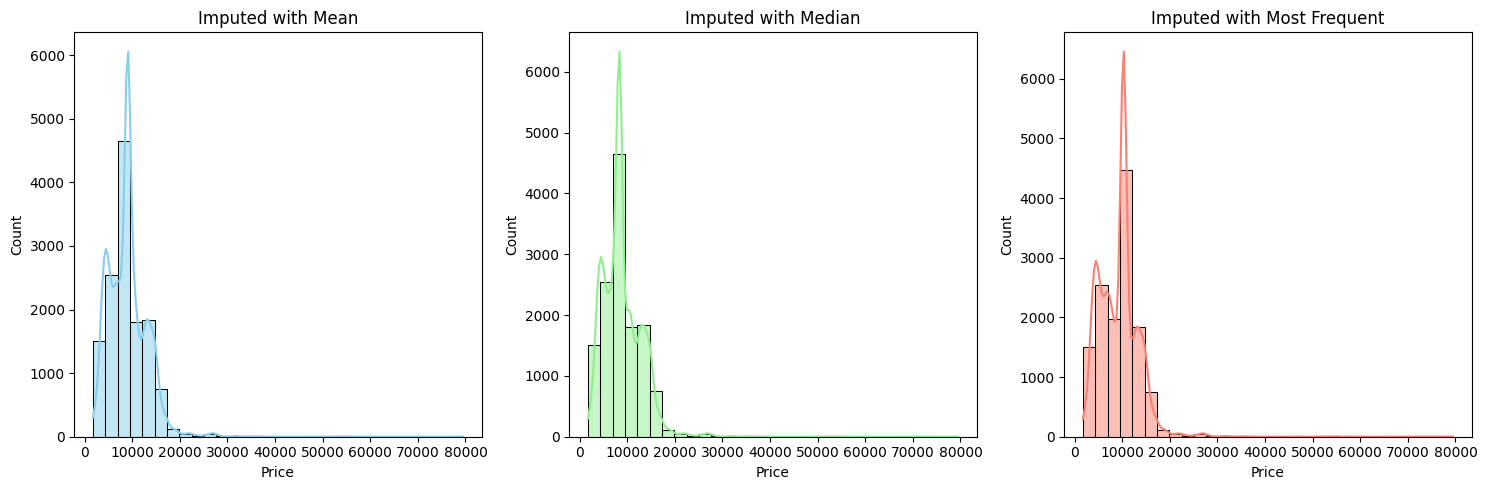

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Copy DataFrame for each strategy
df_mean = final_df.copy()
df_median = final_df.copy()
df_mode = final_df.copy()

# Impute with 'mean'
mean_imputer = SimpleImputer(strategy='mean')
df_mean['Price'] = mean_imputer.fit_transform(df_mean[['Price']])

# Impute with 'median'
median_imputer = SimpleImputer(strategy='median')
df_median['Price'] = median_imputer.fit_transform(df_median[['Price']])

# Impute with 'most_frequent' (mode)
mode_imputer = SimpleImputer(strategy='most_frequent')
df_mode['Price'] = mode_imputer.fit_transform(df_mode[['Price']])

# Plot the curves
plt.figure(figsize=(15, 5))

# Mean
plt.subplot(1, 3, 1)
sns.histplot(df_mean['Price'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Imputed with Mean')
plt.xlabel('Price')

# Median
plt.subplot(1, 3, 2)
sns.histplot(df_median['Price'], bins=30, kde=True, color='lightgreen', edgecolor='black')
plt.title('Imputed with Median')
plt.xlabel('Price')

# Most Frequent
plt.subplot(1, 3, 3)
sns.histplot(df_mode['Price'], bins=30, kde=True, color='salmon', edgecolor='black')
plt.title('Imputed with Most Frequent')
plt.xlabel('Price')

plt.tight_layout()
plt.show()


# ✅ Here's the Interpretation:
# 1. Mean (Left Plot):
# The peak is slightly shifted right.

# Outliers are influencing the mean — it's pulling the imputed values upward.

# This results in a slightly flatter and less accurate representation of the original distribution.

# 2. Median (Middle Plot) — ✅ Best Choice:
# The distribution is smooth and follows the natural pattern of the original data.

# It handles skewness well and isn’t distorted by outliers.

# This is the most balanced and statistically sound option here.

# 3. Most Frequent (Right Plot):
# A sharp spike is visible — this is because it's filling NaNs with a single value (the mode).

# This artificially inflates one price and can mislead any modeling process.